In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import joblib
import numpy as np


url = 'https://raw.githubusercontent.com/MaxCintra/Project__4/main/Data/final_data.csv'
master_data = pd.read_csv(url)

master_data.head()

Rnd  Pick            Player Pos  AP1   PB  College/Univ    Ht     Wt  40yd  \
0  1.0   1.0       Andrew Luck  QB  0.0  1.0      Stanford  76.0  234.0  4.59   
1  1.0   3.0  Trent Richardson  RB  0.0  0.0       Alabama  69.0  228.0  4.48   
2  1.0   4.0        Matt Kalil   T  0.0  1.0           USC  79.0  306.0  4.96   
3  1.0   5.0   Justin Blackmon  WR  0.0  0.0  Oklahoma St.  73.0  207.0  4.46   
4  1.0   6.0  Morris Claiborne  DB  0.0  0.0           LSU  71.0  188.0  4.50   

    Vertical      Bench  Broad Jump     3Cone   Shuttle  Drafted_Binary  \
0  36.000000  15.000000  124.000000  6.800000  4.280000             1.0   
1  34.626404  18.960000  120.636905  7.038725  4.262870             1.0   
2  27.000000  30.000000  105.500000  7.330000  4.650000             1.0   
3  35.839015  14.000000  122.860465  6.944684  4.222308             1.0   
4  34.500000  15.413534  118.000000  7.010000  4.120000             1.0   

   Pos_encoded  College/Univ_encoded  
0            1                     0  
1            2                     1  
2            3                     2  
3            4                     3  
4            5                     4

In [2]:
master_data.drop(['Player','College/Univ','Pos','Rnd','Pick','AP1','PB'], axis=1, inplace=True)
master_data.head()

Ht     Wt  40yd   Vertical      Bench  Broad Jump     3Cone   Shuttle  \
0  76.0  234.0  4.59  36.000000  15.000000  124.000000  6.800000  4.280000   
1  69.0  228.0  4.48  34.626404  18.960000  120.636905  7.038725  4.262870   
2  79.0  306.0  4.96  27.000000  30.000000  105.500000  7.330000  4.650000   
3  73.0  207.0  4.46  35.839015  14.000000  122.860465  6.944684  4.222308   
4  71.0  188.0  4.50  34.500000  15.413534  118.000000  7.010000  4.120000   

   Drafted_Binary  Pos_encoded  College/Univ_encoded  
0             1.0            1                     0  
1             1.0            2                     1  
2             1.0            3                     2  
3             1.0            4                     3  
4             1.0            5                     4

In [3]:
master_data.isnull().any()

Ht                      False
Wt                      False
40yd                    False
Vertical                False
Bench                   False
Broad Jump              False
3Cone                   False
Shuttle                 False
Drafted_Binary          False
Pos_encoded             False
College/Univ_encoded    False
dtype: bool

In [4]:
convert_to_int = ['Drafted_Binary']
master_data[convert_to_int] = master_data[convert_to_int].astype(int)
master_data.head()

Ht     Wt  40yd   Vertical      Bench  Broad Jump     3Cone   Shuttle  \
0  76.0  234.0  4.59  36.000000  15.000000  124.000000  6.800000  4.280000   
1  69.0  228.0  4.48  34.626404  18.960000  120.636905  7.038725  4.262870   
2  79.0  306.0  4.96  27.000000  30.000000  105.500000  7.330000  4.650000   
3  73.0  207.0  4.46  35.839015  14.000000  122.860465  6.944684  4.222308   
4  71.0  188.0  4.50  34.500000  15.413534  118.000000  7.010000  4.120000   

   Drafted_Binary  Pos_encoded  College/Univ_encoded  
0               1            1                     0  
1               1            2                     1  
2               1            3                     2  
3               1            4                     3  
4               1            5                     4

In [5]:
master_data_copy = pd.DataFrame.copy(master_data)
master_data_copy.head(20)

Ht     Wt  40yd   Vertical      Bench  Broad Jump     3Cone   Shuttle  \
0   76.0  234.0  4.59  36.000000  15.000000  124.000000  6.800000  4.280000   
1   69.0  228.0  4.48  34.626404  18.960000  120.636905  7.038725  4.262870   
2   79.0  306.0  4.96  27.000000  30.000000  105.500000  7.330000  4.650000   
3   73.0  207.0  4.46  35.839015  14.000000  122.860465  6.944684  4.222308   
4   71.0  188.0  4.50  34.500000  15.413534  118.000000  7.010000  4.120000   
5   73.0  213.0  4.54  35.929577  15.413534  123.449275  6.936545  4.190702   
6   76.0  221.0  4.65  31.166667  15.000000  112.619048  7.106234  4.322785   
7   75.0  242.0  4.58  38.000000  27.000000  123.000000  6.920000  4.120000   
8   72.0  190.0  4.38  36.000000  15.000000  123.000000  6.610000  3.940000   
9   75.0  346.0  4.89  29.500000  44.000000  105.000000  7.900000  4.560000   
10  76.0  298.0  4.77  26.000000  30.000000  103.000000  7.070000  4.530000   
11  75.0  220.0  4.40  36.500000  16.000000  122.000000  6.944684  4.222308   
12  77.0  322.0  5.31  26.500000  27.365079  105.000000  7.460000  4.810000   
13  75.0  245.0  4.41  33.500000  23.000000  123.000000  6.700000  4.030000   
14  78.0  284.0  4.69  31.500000  25.000000  109.000000  7.570000  4.780000   
15  74.0  186.0  4.50  35.000000  15.413534  120.000000  6.936545  4.190702   
16  73.0  264.0  4.69  34.500000  28.000000  109.000000  6.830000  4.180000   
17  75.0  260.0  4.62  31.500000  19.000000  118.000000  7.070000  4.330000   
18  70.0  196.0  4.49  38.500000  14.941748  121.000000  6.930000  4.180000   
19  77.0  266.0  4.77  35.000000  22.000000  120.000000  7.070000  4.380000   

    Drafted_Binary  Pos_encoded  College/Univ_encoded  
0                1            1                     0  
1                1            2                     1  
2                1            3                     2  
3                1            4                     3  
4                1            5                     4  
5                1            5                     1  
6                1            1                     5  
7                1            6                     6  
8                1            5                     7  
9                1            7                     8  
10               1            7                     9  
11               1            4                    10  
12               1            7                     4  
13               1            8                    11  
14               1            8                    12  
15               1            5                     1  
16               1            8                     7  
17               1            8                    13  
18               1            4                    14  
19               1            8                    15

In [6]:
X = master_data_copy.drop(columns='Drafted_Binary')
y = master_data_copy['Drafted_Binary']


In [7]:
iso_forest = IsolationForest(contamination=0.01, random_state=20)

iso_forest.fit(X)

anomaly_predictions = iso_forest.predict(X)

anomaly_mask = anomaly_predictions == -1

x_clean = X[~anomaly_mask]
y_clean = y[~anomaly_mask]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size = 0.7, random_state=78)

In [9]:
ocsvm_model = OneClassSVM(nu=0.05)

ocsvm_model.fit(X_train)

anomaly_predictions = ocsvm_model.predict(X)

anomaly_mask = anomaly_predictions == -1

x_clean = X[~anomaly_mask]
y_clean = y[~anomaly_mask]

In [10]:
smote = SMOTE(sampling_strategy='auto', random_state=78)
X_resampled, y_resampled = smote.fit_resample(x_clean, y_clean)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.5, random_state=78)

In [11]:
rf_model = RandomForestClassifier(n_estimators=5000, max_depth=20, random_state=20, class_weight='balanced')

In [12]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=5000,
                       random_state=20)

In [13]:
predictions = rf_model.predict(X_test)

In [14]:
print(classification_report(y_test, predictions,
                            target_names=["Not_Drafted", "Drafted"]))

              precision    recall  f1-score   support

 Not_Drafted       0.97      0.99      0.98      1054
     Drafted       0.99      0.97      0.98      1086

    accuracy                           0.98      2140
   macro avg       0.98      0.98      0.98      2140
weighted avg       0.98      0.98      0.98      2140



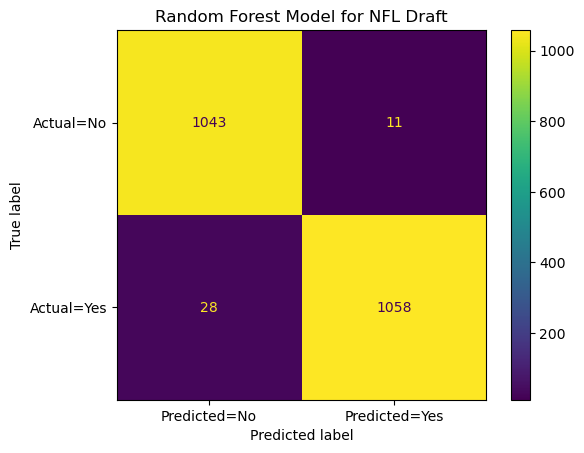

In [15]:
cm = confusion_matrix(y_test, predictions)

true_labels = ["Actual=No", "Actual=Yes"]
predicted_labels = ["Predicted=No", "Predicted=Yes"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()
plt.title('Random Forest Model for NFL Draft')
plt.xticks(np.arange(len(predicted_labels)), predicted_labels)
plt.yticks(np.arange(len(true_labels)), true_labels)
plt.show()

In [16]:
test_sample = {
    'Ht': 72.0,
    'Wt': 200,
    '40yd': 4.650000,
    'Vertical': 32,
    'Bench': 17.39726,
    'Broad Jump': 123.737500,
    '3Cone': 6.911795,
    'Shuttle': 4.187000,
    'Pos_encoded': 18,
    'College/Univ_encoded': 2
}

In [17]:
test_df = pd.DataFrame([test_sample])

In [18]:
prediction = rf_model.predict(test_df)

In [19]:
print("Predicted NFL Draft Status:", prediction[0])

Predicted NFL Draft Status: 1


In [20]:
nfl_draft_prediction_model_file = 'nfl_draft_prediction.joblib'
joblib.dump(rf_model, nfl_draft_prediction_model_file)

['nfl_draft_prediction.joblib']